# Практическое задание 2

In [14]:
import mnist

# The first time you run this might be a bit slow, since the
# mnist package has to download and cache the data.
train_images = mnist.train_images()
train_labels = mnist.train_labels()

test_images = mnist.test_images()
test_labels = mnist.test_labels()

# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

print(train_images.shape) # (60000, 28, 28)
print(train_labels.shape) # (60000,)

(60000, 28, 28)
(60000,)


Визуализируем данные

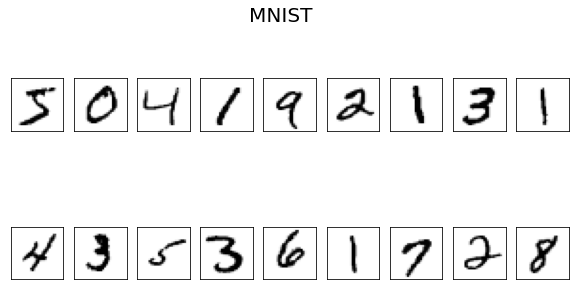

In [15]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 9, figsize=(10, 5))
fig.suptitle('MNIST', fontsize=20)
n = 0
for ax in axes.flat:
    ax.set_yticks([])
    ax.set_xticks([])
    ax.imshow(train_images[n], cmap='Greys')
    n += 1

In [18]:
len()

784

In [19]:
# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)

(60000, 784)
(10000, 784)


# Создание модели

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [23]:
# define the keras model
model = Sequential()
model.add(Dense(64, input_dim=784, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [24]:
# альтернативная запись
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='sigmoid'),
])


# Компиляция модели

In [25]:
# создание keras модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Обучение нейронной сети

In [26]:
from tensorflow.keras.utils import to_categorical

In [27]:
print(train_labels[:5])
to_categorical(train_labels[:5])

[5 0 4 1 9]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [29]:
1875 * 32

60000

In [28]:
%%time
model.fit(train_images, 
          to_categorical(train_labels), 
          epochs=5, 
          batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3608 - accuracy: 0.8921
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1820 - accuracy: 0.9446
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1414 - accuracy: 0.9564
Epoch 4/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1195 - accuracy: 0.9628
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1062 - accuracy: 0.9670
CPU times: total: 1min 27s
Wall time: 1min 7s


# Оценка обученности нейронной сети

In [30]:
# Evaluate the model.
model.evaluate(
  test_images,
  to_categorical(test_labels)
)

313/313 [==============================] - 2s 7ms/step - loss: 0.1083 - accuracy: 0.9664


[0.10832690447568893, 0.9664000272750854]

# Сохранить и загрузить веса

In [31]:
# Save the model to disk.
model.save_weights('model.h5')

# Load the model from disk later using:
model.load_weights('model.h5')

# Запуск нейронной сети для выполнения работы

In [32]:
import numpy as np 

# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labels[:5]) # [7, 2, 1, 0, 4]


1/1 [==============================] - 0s 69ms/step
[7 2 1 0 4]
[7 2 1 0 4]


In [33]:
predictions

array([[4.2818904e-02, 2.7240841e-02, 5.8735561e-01, 9.8740011e-01,
        3.9632805e-04, 2.5327519e-01, 1.9242477e-06, 9.9995816e-01,
        1.7986308e-01, 9.0904540e-01],
       [1.9439639e-01, 9.5050061e-01, 9.9998713e-01, 8.9301604e-01,
        6.1014318e-05, 3.0099696e-02, 9.1766423e-01, 1.7259413e-03,
        5.1865077e-01, 1.3046175e-05],
       [5.3115672e-04, 9.9872428e-01, 3.3503607e-01, 8.8432364e-02,
        6.5438509e-01, 2.4368132e-02, 3.8391799e-03, 8.2584476e-01,
        8.7279117e-01, 1.5730971e-01],
       [9.9994993e-01, 1.4579681e-02, 3.9444125e-01, 7.2572738e-01,
        3.2054372e-02, 1.2047661e-02, 9.1959840e-01, 1.2609267e-01,
        5.5291075e-02, 4.8556009e-01],
       [4.0829951e-01, 1.0429544e-01, 4.1922122e-01, 2.8300840e-01,
        9.9997067e-01, 4.7850399e-03, 8.1455576e-01, 5.7808006e-01,
        2.7725199e-01, 9.8752856e-01]], dtype=float32)